In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


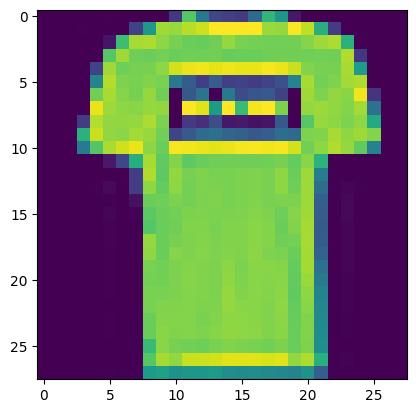

In [4]:
plt.imshow(x_train[1])

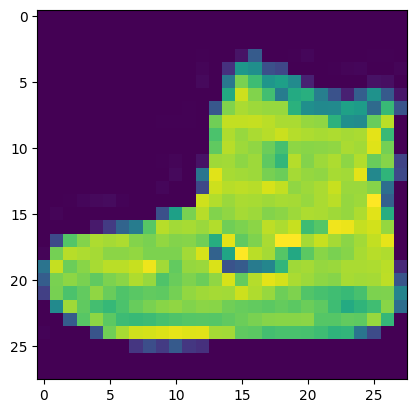

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [12]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 79s 41ms/step - loss: 0.5641 - accuracy: 0.7937 - val_loss: 0.3837 - val_accuracy: 0.8573
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.3717 - accuracy: 0.8630 - val_loss: 0.3210 - val_accuracy: 0.8839
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3274 - accuracy: 0.8800 - val_loss: 0.2994 - val_accuracy: 0.8894
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3020 - accuracy: 0.8880 - val_loss: 0.3065 - val_accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2834 - accuracy: 0.8956 - val_loss: 0.2740 - val_accuracy: 0.8997
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2694 - accuracy: 0.8994 - val_loss: 0.2656 - val_accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2597 - accuracy: 0.9026 - val_loss: 0.2845 -

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2523 - accuracy: 0.9066


In [16]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9065999984741211
